# Keras Shallownet cifar10 example

In [1]:
!git clone https://github.com/AlbertoRomanRamosRodriguez/keras_example

Cloning into 'keras_example'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 29 (delta 7), reused 28 (delta 6), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from keras_example.preprocessing.imagetoarrayprocessor import ImageToArrayPreprocessor
from keras_example.preprocessing.simplepreprocessor import SimpleProcessor
from keras_example.datasets.simpledatasetloader import SimpleDatasetLoader
from keras_example.nn.conv.shallownet import ShallowNet

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10

from imutils import paths

import matplotlib.pyplot as plt
import numpy as np


In [3]:
((trainX, trainY),(testX, testY)) = cifar10.load_data()

trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

labelNames = ["airplane", "automobile", "bird", "cat", "deer",
"dog", "frog", "horse", "ship", "truck"]

170498071/170498071 [==============================] - 6s 0us/step


[INFO] compiling model
[INFO] training network


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/40
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0143 - accuracy: 0.2893 - val_loss: 1.9053 - val_accuracy: 0.3316
Epoch 2/40
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8687 - accuracy: 0.3532 - val_loss: 1.8543 - val_accuracy: 0.3520
Epoch 3/40
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8220 - accuracy: 0.3695 - val_loss: 1.8181 - val_accuracy: 0.3663
Epoch 4/40
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7919 - accuracy: 0.3796 - val_loss: 1.7911 - val_accuracy: 0.3766
Epoch 5/40
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7725 - accuracy: 0.3882 - val_loss: 1.7624 - val_accuracy: 0.3902
Epoch 6/40
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7571 - accuracy: 0.3972 - val_loss: 1.7576 - val_accuracy: 0.3917
Epoch 7/40
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7448 - accuracy: 0.4000 - val_loss: 1.7399 - val_accuracy:

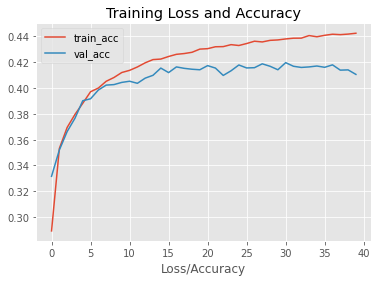

In [9]:
print("[INFO] compiling model")
opt = SGD(lr=0.001)
model = ShallowNet.build(width = 32, height = 32, depth = 3, classes = len(labelNames))
model.compile(loss = "categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

print("[INFO] training network")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs=40,verbose=1)



In [21]:
from datetime import datetime

date = datetime.today().strftime("%m_%d_%Y_%H_%M_%S")

model.save(f"./models/model_cifar10_{date}")

'01_10_2023_12_59_35'

[INFO] evaluating network...
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.42      0.55      0.47      1000
  automobile       0.42      0.54      0.47      1000
        bird       0.33      0.31      0.32      1000
         cat       0.28      0.35      0.31      1000
        deer       0.42      0.28      0.33      1000
         dog       0.35      0.35      0.35      1000
        frog       0.45      0.39      0.42      1000
       horse       0.53      0.42      0.47      1000
        ship       0.54      0.46      0.50      1000
       truck       0.44      0.47      0.45      1000

    accuracy                           0.41     10000
   macro avg       0.42      0.41      0.41     10000
weighted avg       0.42      0.41      0.41     10000



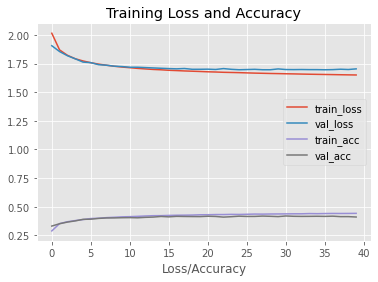

In [10]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), 
  predictions.argmax(axis=1), target_names=labelNames))

plt.style.use('ggplot')
plt.figure()

plt.plot(np.arange(0,40), H.history['loss'], label='train_loss')
plt.plot(np.arange(0,40), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0,40), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0,40), H.history['val_accuracy'], label='val_acc')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.xlabel("Loss/Accuracy")
plt.legend()
plt.show()